In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import os
import re
from fuzzywuzzy import process
import warnings
warnings.filterwarnings('ignore')

In [7]:
%load_ext autoreload
%autoreload 2
from funciones.funciones import check_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from funciones.funciones import check_df

Análisis de los datos de campañas de marketing de una empresa Fintech para
conseguir identificar patrones, tendencias y factores que influyen en que un
cliente acabe contratando un depósito. Tras un análisis exhaustivo de todos sus
datos, habrá que implementar un modelo simple que ayude a entender y predecir
la efectividad de las campañas de marketing, y diseñar un dashboard para la
capa ejecutiva de la fintech con los principales insights y KPIs de los resultados
de las campañas.

In [9]:
os.getcwd()

'c:\\Users\\Arnau\\OneDrive\\Documentos\\GitHub\\data-analytics-tfm'

In [10]:
df = pd.read_excel('bank-additional_bank-additional-full.xlsx')

# **1. Análisis exploratorio de datos**

## **1.1. Primera exploración de los datos.**

Hacemos una primera exploración de los datos con la función *check_df*.

In [11]:
check_df(df)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 41,188 filas y 21 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,2026-01-01 00:00:00,93994.0,-36.4,4857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,2026-01-01 00:00:00,93994.0,-36.4,4857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,2026-01-01 00:00:00,93994.0,-36.4,4857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,2026-01-01 00:00:00,93994.0,-36.4,4857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,2026-01-01 00:00:00,93994.0,-36.4,4857,5191,no



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94767.0,-50.8,1028,4963-06-01 00:00:00,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94767.0,-50.8,1028,4963-06-01 00:00:00,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94767.0,-50.8,1028,4963-06-01 00:00:00,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94767.0,-50.8,1028,4963-06-01 00:00:00,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94767.0,-50.8,1028,4963-06-01 00:00:00,no



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
15688,30,management,single,university.degree,no,yes,no,cellular,jul,mon,...,1,999,0,nonexistent,2026-04-01 00:00:00,93918.0,-42.7,4.96,5228-01-01 00:00:00,no
9446,33,blue-collar,married,basic.9y,no,yes,no,telephone,jun,fri,...,1,999,0,nonexistent,2026-04-01 00:00:00,94465.0,-41.8,4967,5228-01-01 00:00:00,no
5919,40,blue-collar,married,high.school,no,no,yes,telephone,may,tue,...,2,999,0,nonexistent,2026-01-01 00:00:00,93994.0,-36.4,4857,5191,no
35426,48,admin.,divorced,university.degree,no,no,no,cellular,may,mon,...,5,999,1,failure,-1.8,92893.0,-46.2,1244,5099-01-01 00:00:00,no
5031,48,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,wed,...,6,999,0,nonexistent,2026-01-01 00:00:00,93994.0,-36.4,4858,5191,no



########################################################################################
¿Cuáles son las columnas del conjunto de datos? ¿Cuál es el tipo de datos de cada columna?
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate       object
cons.price.idx    float64
cons.conf.idx     float64
euribor3m          object
nr.employed        object
y                  object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object     14
int64       5
float64     2
Name: count, dtype: int64

#######################################################

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,85401.579955,-40.502600
std,10.42125,259.279249,2.770014,186.910907,0.494901,26471.506796,4.628198
min,17.00000,0.000000,1.000000,0.000000,0.000000,93.200000,-50.800000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,92893.000000,-42.700000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,93749.000000,-41.800000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,93994.000000,-36.400000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,94767.000000,-26.900000



########################################################################################
¿Cuáles son las estadísticas descriptivas básicas de las columnas categóricas?


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,emp.var.rate,euribor3m,nr.employed,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,10,315,11,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,2026-04-01 00:00:00,4857,5228-01-01 00:00:00,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,16234,2868,16234,36548


## **1.2. Significado de los atributos / columnas**

Investigación del significado de cada campo.

### **Datos del cliente**

* **age:** Edad

* **job:** Profesión (admin, blue-collar, technician, etc.)

* **marital:** Estado civil (married, single, divorced)

* **education:** Nivel de estudios

* **default:** ¿Ha tenido impagos de crédito? (yes/no/unknown)

* **housing:** ¿Tiene hipoteca? (yes/no/unknown)

* **loan:** ¿Tiene préstamo personal? (yes/no/unknown)


### **Datos de la campaña actual**

* **contact:** Tipo de contacto (cellular/telephone)

* **month:** Mes del último contacto

* **day_of_week:** Día de la semana del último contacto

* **duration:** Duración de la llamada en segundos

* **campaign:** Número de contactos realizados en esta campaña para este cliente


### **Datos de campañas anteriores**

* **pdays:** Días desde el último contacto de una campaña anterior (999 = nunca contactado antes)

* **previous:** Número de contactos en campañas anteriores

* **poutcome:** Resultado de la campaña anterior (success/failure/nonexistent)


### **Datos de indicadores macroeconómicos**

* **emp.var.rate (Employment Variation Rate):**  Tasa de variación del empleo. Mide el cambio porcentual en el nivel de empleo respecto al trimestre anterior. Un valor negativo indica destrucción de empleo, positivo indica creación.

* **cons.price.idx (Consumer Price Index):**   Índice de precios al consumo. Básicamente, la inflación. Valores más altos = cosas más caras.

* **cons.conf.idx(Consumer Confidence Index):** Índice de confianza del consumidor. Mide el optimismo/pesimismo de los hogares sobre la economía. Suele oscilar entre -50 y +50 aproximadamente, donde negativo = pesimismo.

* **euribor3m:**  El Euríbor a 3 meses. El tipo de interés al que los bancos europeos se prestan dinero entre sí. Afecta directamente a hipotecas y productos financieros.

* **nr.employed:** Número de empleados (en miles, normalmente). El volumen total de personas empleadas en el país en ese momento.


### Contratación o no

* **y**: Sí ha contratado o no el depósito.

## **1.3. Análisis Exploratorio de Datos**

**¿Cuál es la proporción de los usuarios que contrataron un depósito?**

In [12]:
df_yes_no = df['y'].value_counts(normalize=True)*100

df_yes_no

y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64

<Axes: ylabel='count'>

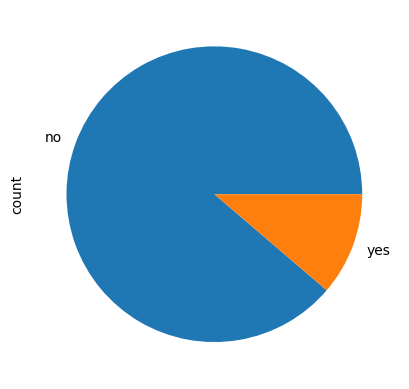

In [13]:
df['y'].value_counts().plot.pie()

**¿Cuál es la distribución de las llamadas en meses?**

<Axes: xlabel='month', ylabel='count'>

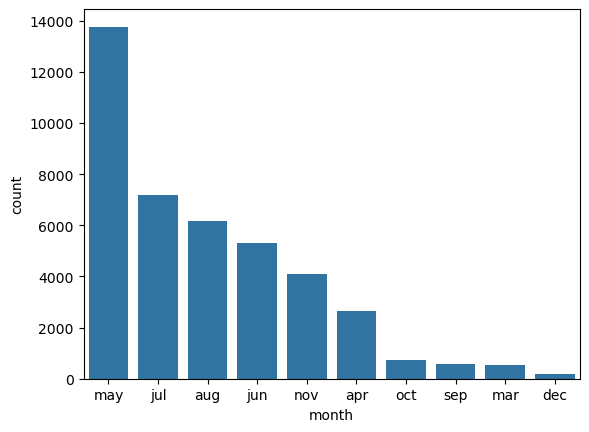

In [14]:
sns.countplot(data=df, x='month', order=df['month'].value_counts().index)

**¿Cuántas veces se contacta al cliente? Distribución**

<Axes: xlabel='campaign', ylabel='Count'>

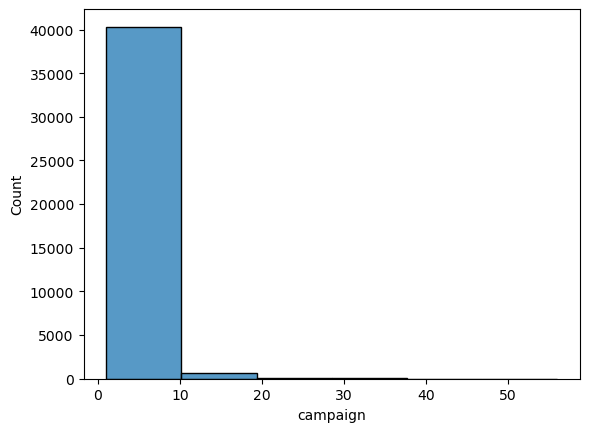

In [15]:
sns.histplot(df['campaign'], bins=6)

**¿Existe correlación entre la contratación del plazo y el euribor?**

In [16]:
df_euribor_yes = df[['euribor3m','y']]

df_euribor_yes.corr()

### El formato está corrupto, no se puede calcular aún

TypeError: float() argument must be a string or a real number, not 'datetime.datetime'

# **2. Contexto, PPDAC**



## **1.   Problema**

## **2.   Plan**

## **3.   Datos**

## **4.   Análisis**

## **5.   Conclusión**



# **3. Limpieza de datos**



## **3.1. Revisar tareas a hacer**


- Ordenar 
    - Los meses.
    - La educación
- Reformatear varios de los registro
- Renombrar varios de los atributos



## **3.2. Valores problemáticos**

### **3.2.1. Nulos y Outliers**

In [ ]:
identificacion_valores_problem(df)

###################################################################################
3.1.1. Proporción de NULOS en cada una de las columnas del conjunto de datos:
age               0.0
campaign          0.0
nr.employed       0.0
euribor3m         0.0
cons.conf.idx     0.0
cons.price.idx    0.0
emp.var.rate      0.0
poutcome          0.0
previous          0.0
pdays             0.0
duration          0.0
job               0.0
day_of_week       0.0
month             0.0
contact           0.0
loan              0.0
housing           0.0
default           0.0
education         0.0
marital           0.0
y                 0.0
dtype: float64
###################################################################################
3.1.2. Número de DUPLICADOS totales: 12
###################################################################################
3.1.3. Columnas numéricas con OUTLIERS
Número de outliers en la columna "age": 469
Número de outliers en la columna "duration": 2963
Número de outliers e

### **3.2.2. Duplicados**

In [ ]:
df.duplicated().sum()

np.int64(12)